In [ ]:
#leemos el csv
import pandas as pd

# Lee el archivo CSV
df = pd.read_csv("listograficos.csv")

# Muestra las primeras filas del DataFrame
print(df.head())


                                               title  \
0  The PlayStation 5 laptop is a 9.5 pound portab...   
1  Why the U.S. government is saying all citizens...   
2   Intel Core Ultra 9 285K vs. Intel Core i9 14900K   
3  Xfce 4.20 Desktop Released With Wayland Improv...   
4  Roguelike ARPG Wizard of Legend 2 adds new bio...   

                                         description  \
0  Weighing in at a whopping 9.5 pounds for the l...   
1  Think twice before sending your next text mess...   
2  Intel's two latest flagships, the Core Ultra 9...   
3  After roughly two years of development the Xfc...   
4  As Wizard of Legend 2 early access rolls on, d...   

                                                 url               author  \
0  https://www.techspot.com/news/105966-playstati...             Zo Ahmed   
1  https://www.cnbc.com/2024/12/15/why-the-fbi-wa...  Cheryl Winokur Munk   
2  https://www.techspot.com/review/2934-intel-cor...        Steven Walton   
3   https://www.ph

## Gráfico de top 5 categorías de noticias (gráfico de barras)

In [4]:
import plotly.express as px

# Contar las categorías
top_categories = df['category'].value_counts().reset_index()
top_categories.columns = ['Category', 'Count']

# Colores personalizados
custom_colors = ['#4e85d5', '#25a146', '#f8fb14', '#e51313', '#e26ec4']  # Agregué un color adicional en caso de que se necesiten 5 colores

# Crear gráfico de barras
fig = px.bar(top_categories.head(5), x='Category', y='Count', text='Count')

# Personalizar colores de las barras manualmente
fig.update_traces(marker_color=custom_colors[:len(top_categories.head(5))], textfont_size=14, textposition='outside')

# Actualizar layout
fig.update_layout(
    title="<b>Top 5 Categorías con Más Noticias</b>",  # Título en negrita
    font=dict(family="Arial, sans-serif", size=16, color="#2c3e50"),  # Fuente y color
    template="plotly_white",  # Estilo de fondo blanco
    plot_bgcolor="#FAFAFA",  # Fondo del gráfico
    paper_bgcolor="#FFFFFF",  # Fondo del área de trabajo
    yaxis=dict(showgrid=False),  # Fondo de la rejilla
    xaxis=dict(title=dict(font=dict(size=16, color="black"))),  # Etiquetas del eje X
    showlegend=False  # Quitar leyenda
)

# Mostrar el gráfico
fig.show()



## Gráfico de top de categorías de noticias (gráfico de pie)

In [5]:
import plotly.express as px

# Contar las categorías
category_counts = df['category'].value_counts()

# Colores personalizados
custom_colors = ['#4e85d5', '#25a146', '#f8fb14', '#e51313', '#e26ec4']  # Colores para las categorías

# Crear gráfico de torta
fig = px.pie(names=category_counts.index, values=category_counts.values, hole=0.3, 
             color=category_counts.index, color_discrete_sequence=custom_colors)

# Personalizar el gráfico
fig.update_traces(
    textinfo='percent+label',  # Muestra porcentaje y nombre de la categoría
    pull=[0.1, 0.1, 0.1, 0.1, 0.1],  # Efecto de separación para darle dinamismo
    textfont=dict(size=14, color='white'),  # Estilo del texto
    marker=dict(line=dict(color='#FFFFFF', width=1))  # Borde blanco alrededor de cada sección
)

# Actualizar layout
fig.update_layout(
    title="<b>Distribución de Noticias por Categoría</b>",  # Título en negrita
    title_font=dict(size=20, color='#333333'),  # Estilo del título
    font=dict(family="Arial, sans-serif", size=14, color="#333333"),  # Fuente general
    template="plotly_white",  # Estilo con fondo blanco
    plot_bgcolor="#FFFFFF",  # Fondo del gráfico blanco
    paper_bgcolor="#F4F4F4",  # Fondo más suave para el área de trabajo
    showlegend=True  # Eliminar leyenda para mayor claridad
)

# Mostrar gráfico
fig.show()


## Gráfico de top 10 fuentes (gráfico de barras)

In [6]:
import plotly.express as px

# Obtener las 10 fuentes principales
top_sources = df['source_label'].value_counts().head(10)

# Colores personalizados
custom_colors = ['#4e85d5', '#25a146', '#f8fb14', '#e51313', '#e26ec4', 
                 '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Colores personalizados

# Crear gráfico de barras con colores personalizados
fig = px.bar(top_sources, x=top_sources.index, y=top_sources.values,
             title="Top 10 Fuentes por Noticias", labels={'x': 'Fuente', 'y': 'Número de Noticias'},
             color=top_sources.index, color_discrete_sequence=custom_colors)

# Personalización del gráfico
fig.update_layout(
    template="plotly_white",  # Estilo de fondo blanco
    title="<b>Top 10 Fuentes por Noticias</b>",  # Título en negrita
    font=dict(family="Arial, sans-serif", size=16, color="#2c3e50"),  # Fuente y color
    xaxis=dict(tickangle=45, title=dict(font=dict(size=14, color="black"))),  # Ángulo de las etiquetas del eje X
    yaxis=dict(title=dict(font=dict(size=14, color="black")), showgrid=False),  # Personalizar el eje Y y quitar la cuadrícula
    plot_bgcolor="#FAFAFA",  # Fondo del gráfico
    paper_bgcolor="#FFFFFF",  # Fondo del área de trabajo
    showlegend=False,  # Quitar leyenda
    barmode='group',  # Agrupar las barras
    xaxis_title="Fuente",  # Título del eje X
    yaxis_title="Número de Noticias",  # Título del eje Y
    bargap=0.05,  # Reducir el espacio entre las barras
    bargroupgap=0.1,  # Ajuste adicional para el espacio entre grupos de barras
    height=500,  # Ajustar la altura del gráfico
    width=900  # Ajustar el ancho del gráfico
)

# Mostrar gráfico
fig.show()


## Gráfico de análisis de sentimientos por categoría

#### Instalación de paquetes

In [92]:
import subprocess
import sys

def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"'{package}' instalado correctamente.")
    except subprocess.CalledProcessError as e:
        print(f"Error al instalar '{package}': {e}")
    except Exception as ex:
        print(f"Algo salió mal: {ex}")

# Instalar vaderSentiment
install_package("vaderSentiment")


'vaderSentiment' instalado correctamente.


In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Configurar tema
pio.templates.default = "seaborn"

# Inicializar analizador de sentimientos
analyzer = SentimentIntensityAnalyzer()

# Función para obtener el sentimiento
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Añadir columna de sentimiento
df['sentiment'] = df['title'].apply(get_sentiment)

# Paleta de colores vibrantes
color_palette = {
    "Positive": "#FFF700",  # Amarillo
    "Negative": "#FF1717",  # Rojo tomate
    "Neutral": "#2917ED"    # Azul vibrante
}

# Generar gráficos por categoría
categories = df['category'].unique()

for category in categories:
    category_data = df[df['category'] == category]
    sentiment_counts = category_data['sentiment'].value_counts()

    # Crear gráfico de torta (pie chart)
    fig = px.pie(
        sentiment_counts,
        names=sentiment_counts.index,
        values=sentiment_counts.values,
        title=f"<b>Distribución de Sentimientos en la categoría {category}</b>",
        color=sentiment_counts.index,
        color_discrete_map=color_palette,
        hole=0.3  # Hacer un gráfico de dona (hole en 0.3)
    )

    # Personalización del gráfico
    fig.update_traces(
        textinfo='percent+label',  # Mostrar porcentaje y nombre de la categoría
        pull=[0.1, 0.1, 0.1],  # Efecto de separación para darle dinamismo
        textfont=dict(size=14, color='white'),  # Estilo del texto
        marker=dict(line=dict(color='#FFFFFF', width=1))  # Borde blanco alrededor de cada sección
    )

    # Personalización del layout
    fig.update_layout(
        font=dict(family="Arial, sans-serif", size=14, color="black"),
        plot_bgcolor="#FAFAFA",  # Fondo del gráfico
        paper_bgcolor="#FFFFFF",  # Fondo del área de trabajo
        title=dict(font=dict(size=20, color="#333333"), x=0.5),  # Título centrado y en negrita
        legend_title=dict(font=dict(size=14, color="black")),  # Título de la leyenda
        legend=dict(font=dict(size=12, color="black"), orientation="h", y=1.1),  # Leyenda en horizontal
        height=500,  # Ajustar la altura del gráfico
        width=700  # Ajustar el ancho del gráfico
    )

    # Mostrar gráfico
    fig.show()


## Gráfico de nube de palabras más usadas en los títulos de las noticias

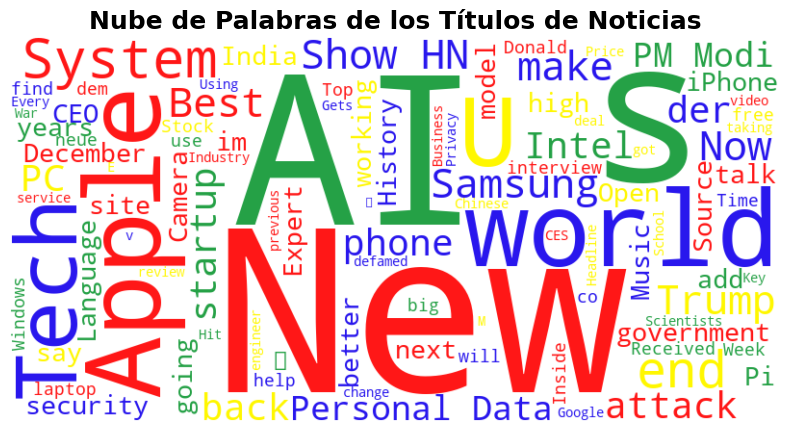

In [12]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Definir la paleta de colores personalizada con el verde añadido
color_palette = ["#FFF700", "#FF1717", "#2917ED", "#25a146"]  # Amarillo, Rojo, Azul, Verde

# Función para asignar un color aleatorio de la paleta personalizada a cada palabra
def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(color_palette)

# Obtener todos los títulos de las noticias
titles = df['title'].dropna().tolist()  # Obtener solo los títulos, asegurándonos de que no haya valores nulos

# Unir todos los títulos en un solo texto
text = " ".join(titles)

# Crear la nube de palabras con la paleta personalizada
wordcloud = WordCloud(
    width=800,  # Ancho de la imagen
    height=400,  # Alto de la imagen
    background_color='white',  # Color de fondo
    max_words=100,  # Número máximo de palabras a mostrar
    color_func=random_color_func,  # Usar la función para asignar color aleatorio de la paleta
    contour_color='black',  # Color del contorno de las palabras
    contour_width=1  # Grosor del contorno de las palabras
).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Quitar los ejes
plt.title("Nube de Palabras de los Títulos de Noticias", fontsize=18, fontweight='bold')
plt.show()
